In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
import multiprocessing

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path_C01 = '/content/drive/MyDrive/TM_Dataset'

In [ ]:
aggression_df = pd.read_csv(data_path_C01 + '/aggression_parsed_dataset.csv')
attack_df = pd.read_csv(data_path_C01 + '/attack_parsed_dataset.csv')
kaggle_df = pd.read_csv(data_path_C01 + '/kaggle_parsed_dataset.csv')
toxicity_df = pd.read_csv(data_path_C01 + '/toxicity_parsed_dataset.csv')
twitparse_df = pd.read_csv(data_path_C01 + '/twitter_parsed_dataset.csv')
twitracism_df = pd.read_csv(data_path_C01 + '/twitter_racism_parsed_dataset.csv')
twitsexism_df = pd.read_csv(data_path_C01 + '/twitter_sexism_parsed_dataset.csv')
youtube_df = pd.read_csv(data_path_C01 + '/youtube_parsed_dataset.csv')

In [ ]:
aggression_df = aggression_df[['Text','oh_label']]
attack_df = attack_df[['Text','oh_label']]
kaggle_df = kaggle_df[['Text','oh_label']]
toxicity_df = toxicity_df[['Text','oh_label']]
twitparse_df = twitparse_df[['Text','oh_label']]
twitracism_df = twitracism_df[['Text','oh_label']]
twitsexism_df = twitsexism_df[['Text','oh_label']]
youtube_df = youtube_df[['Text','oh_label']]

In [ ]:
combined_data = pd.concat([aggression_df, attack_df,kaggle_df,toxicity_df,twitparse_df,twitracism_df,twitsexism_df,youtube_df])

In [ ]:
combined_data.describe()

,oh_label
count,448874.000000
mean,0.128435
std,0.334574
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
combined_data.head()

,Text,oh_label
0,`- This is not ``creative``. Those are the di...,0.0
1,` :: the term ``standard model`` is itself le...,0.0
2,"True or false, the situation as of March 200...",0.0
3,"Next, maybe you could work on being less cond...",0.0
4,This page will need disambiguation.,0.0


In [ ]:
combined_data = combined_data.dropna()

In [ ]:
combined_data['clean_regex'] = combined_data['Text'].replace(r'[^\w\s]|_', '', regex=True)
combined_data.head()

,Text,oh_label,clean_regex
0,`- This is not ``creative``. Those are the di...,0.0,This is not creative Those are the dictionar...
1,` :: the term ``standard model`` is itself le...,0.0,the term standard model is itself less NPOV...
2,"True or false, the situation as of March 200...",0.0,True or false the situation as of March 2002...
3,"Next, maybe you could work on being less cond...",0.0,Next maybe you could work on being less conde...
4,This page will need disambiguation.,0.0,This page will need disambiguation


In [ ]:
combined_data["text_length"] = combined_data['clean_regex'].str.len()
combined_data.head()

,Text,oh_label,clean_regex,text_length
0,`- This is not ``creative``. Those are the di...,0.0,This is not creative Those are the dictionar...,2227
1,` :: the term ``standard model`` is itself le...,0.0,the term standard model is itself less NPOV...,660
2,"True or false, the situation as of March 200...",0.0,True or false the situation as of March 2002...,321
3,"Next, maybe you could work on being less cond...",0.0,Next maybe you could work on being less conde...,421
4,This page will need disambiguation.,0.0,This page will need disambiguation,35


In [ ]:
combined_data[combined_data['text_length'] < 20].sort_values(by=['text_length'], ascending=True)

,Text,oh_label,clean_regex,text_length
3233,...,0.0,,0
2804,-_-,1.0,,0
277,...,0.0,,0
2478,**,0.0,,0
1995,...,0.0,,0
...,...,...,...,...
98124,Kurt Wallander.,0.0,Kurt Wallander,19
97475,"ok cool guy, thanks.....",0.0,ok cool guy thanks,19
96420,"` : ^This, in spades^ `",0.0,This in spades,19
94666,"14:10, 3 January 2010",0.0,1410 3 January 2010,19


In [ ]:
combined_data[combined_data['text_length'] == 9]

,Text,oh_label,clean_regex,text_length
1806,Done!,0.0,Done,9
6765,` / / `,0.0,,9
44141,"` :Ok, and? ♥♥♥♥ `",0.0,Ok and,9
45176,:True.,0.0,True,9
53018,:Done.,0.0,Done,9
...,...,...,...,...
1730,8 flavaz :),0.0,8 flavaz,9
1962,21 ( ) ^^ ^o^ ^ ^,0.0,21 o,9
2991,Thank you!,0.0,Thank you,9
3051,Brittany !,0.0,Brittany,9


In [ ]:
combined_data[combined_data['text_length'] == 10]

,Text,oh_label,clean_regex,text_length
11262,::How so?,0.0,How so,10
31008,p.s. NAIR!!!!!!!!!!!!!!!!!!!!!,0.0,ps NAIR,10
50840,:Why so?,0.0,Why so,10
61170,:I Agree.'''''',0.0,I Agree,10
62688,` : RU SRS??? `,0.0,RU SRS,10
...,...,...,...,...
12288,@AgQueue uh.,0.0,AgQueue uh,10
13670,Bugger #mkr,0.0,Bugger mkr,10
583,G.T.L xp lol,0.0,GTL xp lol,10
2769,3 marry me,0.0,3 marry me,10


In [ ]:
combined_data.drop(combined_data[combined_data.text_length < 10].index, inplace=True)

In [ ]:
combined_data

,Text,oh_label,clean_regex,text_length
0,`- This is not ``creative``. Those are the di...,0.0,This is not creative Those are the dictionar...,2227
1,` :: the term ``standard model`` is itself le...,0.0,the term standard model is itself less NPOV...,660
2,"True or false, the situation as of March 200...",0.0,True or false the situation as of March 2002...,321
3,"Next, maybe you could work on being less cond...",0.0,Next maybe you could work on being less conde...,421
4,This page will need disambiguation.,0.0,This page will need disambiguation,35
...,...,...,...,...
3458,228((( real!!!! by walt disney=,0.0,228 real by walt disney,23
3459,She pretty I love this song I miss the old kel...,1.0,She pretty I love this song I miss the old kel...,270
3460,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0.0,StatusOnline Im ZxkillergirlzX Im Zxkillergirl...,114
3461,JR so cute EXO M Better I agree like yeah yeah...,0.0,JR so cute EXO M Better I agree like yeah yeah...,188


In [ ]:
combined_data.drop_duplicates(inplace=True)

In [ ]:
combined_data

,Text,oh_label,clean_regex,text_length
0,`- This is not ``creative``. Those are the di...,0.0,This is not creative Those are the dictionar...,2227
1,` :: the term ``standard model`` is itself le...,0.0,the term standard model is itself less NPOV...,660
2,"True or false, the situation as of March 200...",0.0,True or false the situation as of March 2002...,321
3,"Next, maybe you could work on being less cond...",0.0,Next maybe you could work on being less conde...,421
4,This page will need disambiguation.,0.0,This page will need disambiguation,35
...,...,...,...,...
3458,228((( real!!!! by walt disney=,0.0,228 real by walt disney,23
3459,She pretty I love this song I miss the old kel...,1.0,She pretty I love this song I miss the old kel...,270
3460,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0.0,StatusOnline Im ZxkillergirlzX Im Zxkillergirl...,114
3461,JR so cute EXO M Better I agree like yeah yeah...,0.0,JR so cute EXO M Better I agree like yeah yeah...,188


In [ ]:
combined_data['clean_lower'] = combined_data['clean_regex'].str.lower()
combined_data

,Text,oh_label,clean_regex,text_length,clean_lower
0,`- This is not ``creative``. Those are the di...,0.0,This is not creative Those are the dictionar...,2227,this is not creative those are the dictionar...
1,` :: the term ``standard model`` is itself le...,0.0,the term standard model is itself less NPOV...,660,the term standard model is itself less npov...
2,"True or false, the situation as of March 200...",0.0,True or false the situation as of March 2002...,321,true or false the situation as of march 2002...
3,"Next, maybe you could work on being less cond...",0.0,Next maybe you could work on being less conde...,421,next maybe you could work on being less conde...
4,This page will need disambiguation.,0.0,This page will need disambiguation,35,this page will need disambiguation
...,...,...,...,...,...
3458,228((( real!!!! by walt disney=,0.0,228 real by walt disney,23,228 real by walt disney
3459,She pretty I love this song I miss the old kel...,1.0,She pretty I love this song I miss the old kel...,270,she pretty i love this song i miss the old kel...
3460,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0.0,StatusOnline Im ZxkillergirlzX Im Zxkillergirl...,114,statusonline im zxkillergirlzx im zxkillergirl...
3461,JR so cute EXO M Better I agree like yeah yeah...,0.0,JR so cute EXO M Better I agree like yeah yeah...,188,jr so cute exo m better i agree like yeah yeah...


In [ ]:
combined_data['tokenized_text'] = combined_data.apply(lambda row: nltk.word_tokenize(row['clean_lower']), axis=1)

stop_words = set(stopwords.words('english'))
  
proc_sentence = []
  
for desc in combined_data['tokenized_text']:
    filtered_sentence = []
    for word in desc:
        if word not in stop_words: 
            filtered_sentence.append(word)
    proc_sentence.append(filtered_sentence)

In [ ]:
combined_data['remaining_words'] = proc_sentence
combined_data

,Text,oh_label,clean_regex,text_length,clean_lower,tokenized_text,remaining_words
0,`- This is not ``creative``. Those are the di...,0.0,This is not creative Those are the dictionar...,2227,this is not creative those are the dictionar...,"[this, is, not, creative, those, are, the, dic...","[creative, dictionary, definitions, terms, ins..."
1,` :: the term ``standard model`` is itself le...,0.0,the term standard model is itself less NPOV...,660,the term standard model is itself less npov...,"[the, term, standard, model, is, itself, less,...","[term, standard, model, less, npov, think, wed..."
2,"True or false, the situation as of March 200...",0.0,True or false the situation as of March 2002...,321,true or false the situation as of march 2002...,"[true, or, false, the, situation, as, of, marc...","[true, false, situation, march, 2002, saudi, p..."
3,"Next, maybe you could work on being less cond...",0.0,Next maybe you could work on being less conde...,421,next maybe you could work on being less conde...,"[next, maybe, you, could, work, on, being, les...","[next, maybe, could, work, less, condescending..."
4,This page will need disambiguation.,0.0,This page will need disambiguation,35,this page will need disambiguation,"[this, page, will, need, disambiguation]","[page, need, disambiguation]"
...,...,...,...,...,...,...,...
3458,228((( real!!!! by walt disney=,0.0,228 real by walt disney,23,228 real by walt disney,"[228, real, by, walt, disney]","[228, real, walt, disney]"
3459,She pretty I love this song I miss the old kel...,1.0,She pretty I love this song I miss the old kel...,270,she pretty i love this song i miss the old kel...,"[she, pretty, i, love, this, song, i, miss, th...","[pretty, love, song, miss, old, kelly, ok, rih..."
3460,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...,0.0,StatusOnline Im ZxkillergirlzX Im Zxkillergirl...,114,statusonline im zxkillergirlzx im zxkillergirl...,"[statusonline, im, zxkillergirlzx, im, zxkille...","[statusonline, im, zxkillergirlzx, im, zxkille..."
3461,JR so cute EXO M Better I agree like yeah yeah...,0.0,JR so cute EXO M Better I agree like yeah yeah...,188,jr so cute exo m better i agree like yeah yeah...,"[jr, so, cute, exo, m, better, i, agree, like,...","[jr, cute, exo, better, agree, like, yeah, yea..."


In [ ]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    elif treebank_tag.startswith('S'):
        return wordnet.ADJ_SAT
    else:
        return None
pos_tag_all = []
count = 0
for row in combined_data['remaining_words']:
    pos_tag_row = []
    count += 1
    print(count)
    for word in row:
        tagged = nltk.pos_tag([word])
        pos_tag_row.append(tagged)
    pos_tag_all.append(pos_tag_row)
combined_data['pos_tag_words'] = pos_tag_all  

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatize_all = []
for row in combined_data['pos_tag_words']:
    lemmatize_row = []
    for tagss in row:
        for tags in tagss:
            word = tags[0]
            tag = tags[1]
            wntag = get_wordnet_pos(tag)
            if wntag is None:
                lem_word = lemmatizer.lemmatize(word)
            else:
                lem_word = lemmatizer.lemmatize(word, pos=wntag) 
            lemmatize_row.append(lem_word)
    lemmatize_all.append(lemmatize_row)
combined_data['lemmatize_words'] = lemmatize_all

In [ ]:
!pip install -U gensim

     |████████████████████████████████| 24.1 MB 23.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from sklearn.decomposition import NMF
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
p_text = combined_data['lemmatize_words']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,article,96828
1,page,74104
2,wikipedia,46987
3,like,46371
4,make,44101
5,use,43556
6,one,43350
7,would,42003
8,please,39951
9,dont,39210


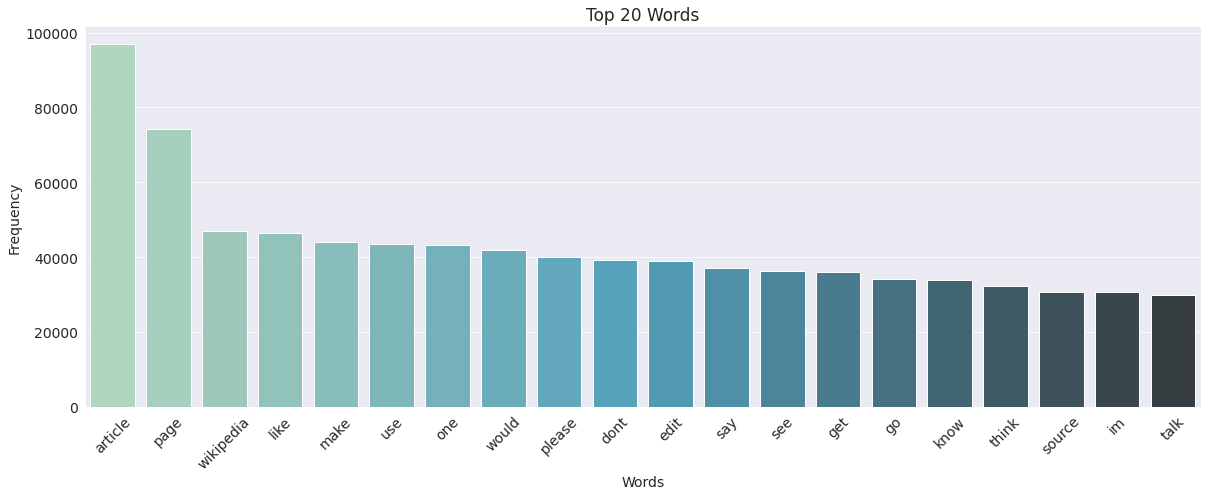

In [ ]:
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()


In [ ]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = combined_data['lemmatize_words']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 35 + 1, 5))

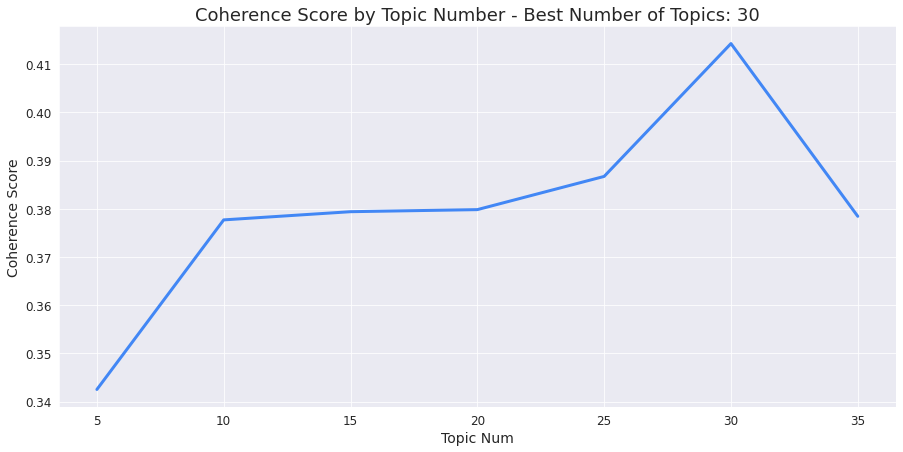

In [ ]:
# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)


plt.show()

In [ ]:
texts = combined_data['lemmatize_words']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=424
).fit(tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 1),
    preprocessor=' '.join
)
tfidf2 = tfidf_vectorizer2.fit_transform(texts)

In [ ]:
nmf2 = NMF(
    n_components=25,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=424
).fit(tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
nmf3 = NMF(
    n_components=25,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=424
).fit(tfidf2)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
nmf4 = NMF(
    n_components=30,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=424
).fit(tfidf2)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,


In [ ]:
n_top_words = 8

In [ ]:
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]

In [ ]:
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = ("topic_%d:" % topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

In [ ]:
topic_df2 = topic_table(nmf2,tfidf_fn,n_top_words).T

In [ ]:
tfidf_fn3 = tfidf_vectorizer2.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
topic_df3 = topic_table(nmf3,tfidf_fn3,n_top_words).T

In [ ]:
topic_df = topic_table(nmf,tfidf_fn,n_top_words).T

In [ ]:
topic_df4 = topic_table(nmf4,tfidf_fn3,n_top_words).T

In [ ]:
topic_df

,0,1,2,3,4,5,6,7
topic_0:,article,create,merge,section,reference,write,improve,need
topic_1:,edit,vandalize,block edit,vandalize page,continue block,continue,please vandalize,page edit
topic_2:,one,make,would,well,time,people,also,even
topic_3:,page,talk,talk page,user,user page,post,reply,discussion
topic_4:,mkr,kat,andre,mkr2015,kat andre,amp,mykitchenrules,girl
topic_5:,redirect,film,album,song,station,school,page,merge
topic_6:,test,revert,sandbox,use sandbox,experiment,thank,please use,learn contribute
topic_7:,fuck,shit,bitch,go fuck,fuck fuck,as,cunt,asshole
topic_8:,thanks,hi,help,ill,appreciate,thanks thanks,ok,thanks help
topic_9:,deletion,speedy,speedy deletion,tag,delete,may,criterion,subject


In [ ]:
topic_df2

,0,1,2,3,4,5,6,7
topic_0:,article,create,merge,section,write,reference,improve,need
topic_1:,edit,vandalize,block edit,vandalize page,continue block,please vandalize,continue,page edit
topic_2:,one,make,would,time,well,people,change,also
topic_3:,page,talk,talk page,user,post,user page,discussion,reply
topic_4:,mkr,kat,andre,mkr2015,kat andre,amp,mykitchenrules,go
topic_5:,redirect,film,album,song,station,school,page,merge
topic_6:,test,revert,sandbox,use sandbox,thank,experiment,please use,learn contribute
topic_7:,fuck,shit,bitch,go,go fuck,fuck fuck,as,cunt
topic_8:,thanks,hi,help,ill,appreciate,thanks thanks,ok,thanks help
topic_9:,deletion,speedy,speedy deletion,tag,delete,may,criterion,add


In [ ]:
topic_df3

,0,1,2,3,4,5,6,7
topic_0:,one,well,time,would,people,also,even,give
topic_1:,edit,vandalize,continue,page,revert,war,summary,disruptive
topic_2:,make,edits,comment,change,user,attack,personal,ip
topic_3:,page,talk,user,discussion,post,message,reply,delete
topic_4:,test,thank,revert,sandbox,experiment,remove,want,use
topic_5:,fuck,shit,bitch,as,asshole,cunt,suck,faggot
topic_6:,mkr,kat,rt,andre,mkr2015,amp,mykitchenrules,girl
topic_7:,deletion,speedy,tag,delete,may,criterion,add,subject
topic_8:,thanks,hi,help,appreciate,ill,much,ok,fix
topic_9:,redirect,talklist,film,album,song,school,station,merge


In [ ]:
topic_df4

,0,1,2,3,4,5,6,7
topic_0:,deletion,speedy,tag,delete,may,criterion,subject,guideline
topic_1:,edit,block,vandalize,continue,page,ip,war,disruptive
topic_2:,one,well,time,people,also,even,give,take
topic_3:,page,talk,user,discussion,post,message,reply,delete
topic_4:,test,revert,sandbox,remove,want,experiment,learn,take
topic_5:,fuck,shit,bitch,as,asshole,cunt,suck,faggot
topic_6:,mkr,kat,rt,andre,mkr2015,amp,mykitchenrules,girl
topic_7:,image,use,copyright,fair,medium,uploaded,list,rationale
topic_8:,thanks,hi,ill,help,appreciate,ok,fix,ive
topic_9:,redirect,talklist,film,album,song,school,station,merge


In [ ]:
words = []

columns = 8
rows = 30

for i in range(rows):
    word = []
    for j in range(columns):
        word.append(topic_df[j].iloc[i])
    words.append(word)

In [ ]:
topic_df['topics'] = words

In [ ]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df

,topic_num,topics
0,topic_0:,"[article, create, merge, section, reference, w..."
1,topic_1:,"[edit, vandalize, block edit, vandalize page, ..."
2,topic_2:,"[one, make, would, well, time, people, also, e..."
3,topic_3:,"[page, talk, talk page, user, user page, post,..."
4,topic_4:,"[mkr, kat, andre, mkr2015, kat andre, amp, myk..."
5,topic_5:,"[redirect, film, album, song, station, school,..."
6,topic_6:,"[test, revert, sandbox, use sandbox, experimen..."
7,topic_7:,"[fuck, shit, bitch, go fuck, fuck fuck, as, cu..."
8,topic_8:,"[thanks, hi, help, ill, appreciate, thanks tha..."
9,topic_9:,"[deletion, speedy, speedy deletion, tag, delet..."
